# 一、Fisher线性判别算法
### steps
1. 求协方差，使用协方差代替类内离散度矩阵
2. 计算最佳投影方向
    + $W^*=S_w^{-1}(\mu_1-\mu_2),\mu是均值, dim(W^*)=p*1$
    + $y_{projection}=(W^*)^T * X$

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
%matplotlib inline
from PIL import Image

class Fisher:
    def __init__(self):
        '''
            无需指定参数
        '''
        self.W=None
        
    def fit(self, X1, X2):
        '''
            传入 X1和 X2 维度为 (N*p), N为样本数，p为维度,N可不同,格式可为 np.array 和 pd.DataFrame
            fit 仅训练样本
        '''
        assert X1.shape[1]==X2.shape[1]
        X1,X2=np.array(X1),np.array(X2)
        
        s1=np.cov(X1.T)                  ## 这里使用协方差矩阵，协方差矩阵/(维度-1)=离散度矩阵
        s2=np.cov(X2.T)
        sw=s1+s2                        
        self.W=np.linalg.inv(sw).dot((X1.mean(axis=0)-X2.mean(axis=0))) 
        
    def transform(self,X):
        return self.W.T.dot(X.T)
    



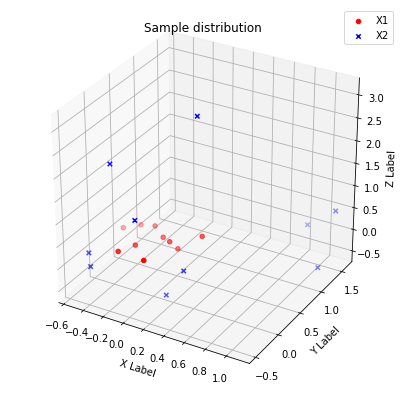

In [42]:

X1=[[-0.4,0.58,0.089],
   [-0.31,0.27,-0.04],
   [-0.38,0.055,-0.035],
   [-0.15,0.53,0.011],
   [-0.53,0.47,0.034],
   [0.17,0.69,0.1],
   [-0.011,0.55,-0.18],
   [-0.27,0.61,0.12],
   [-0.065,0.49,0.0012],
   [-0.12,0.054,-0.063]]
X2=[[0.83,1.6,-0.014],
   [1.1,1.6,0.48],
   [-0.44,-0.41,0.32],
   [0.047,-0.45,1.4],
   [0.28,0.35,3.1],
   [-0.39,-0.48,0.11],
   [0.34,-0.079,0.14],
   [-0.3,-0.22,2.2],
   [1.1,1.2,-0.46],
   [0.18,-0.11,-0.49]]

X1=np.array(X1)
X2=np.array(X2)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[:,0], X1[:,1], X1[:,2], c='r', marker='o',label='X1')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c='b', marker='x',label='X2')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.legend()
plt.title('Sample distribution')
plt.show()

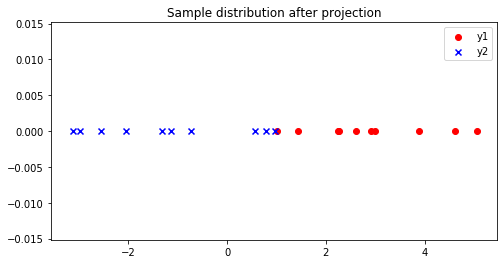

In [43]:
fisher=Fisher()
fisher.fit(X1,X2)
y1=fisher.transform(X1)
y2=fisher.transform(X2)


fig=plt.figure(figsize=(8,4))

plt.scatter(y1,[0 for i in range(y1.shape[0])],c='r',marker='o',label='y1')
plt.scatter(y2,[0 for i in range(y1.shape[0])],c='b',marker='x',label='y2')
plt.title('Sample distribution after projection')
plt.legend()
plt.show()